In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (We link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)

In [5]:
#  3. Convert the June temperatures to a list.
results6 = []
results6 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df6 = pd.DataFrame(results6, columns=['date','temperature observations'])
df6.set_index(df6['date'], inplace=True)
df6 = df6.sort_index()
df6

,date,temperature observations
date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0
...,...,...
2017-06-30,2017-06-30,76.0
2017-06-30,2017-06-30,75.0
2017-06-30,2017-06-30,75.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df6.describe()

,temperature observations
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [9]:
# 7. Convert the December temperatures to a list.
results12 = []
results12 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df12 = pd.DataFrame(results12, columns=['date','temperature observations'])
df12.set_index(df12['date'], inplace=True)
df12 = df12.sort_index()
df12

,date,temperature observations
date,,
2010-12-01,2010-12-01,76.0
2010-12-01,2010-12-01,73.0
2010-12-01,2010-12-01,72.0
2010-12-01,2010-12-01,78.0
2010-12-01,2010-12-01,72.0
...,...,...
2016-12-31,2016-12-31,67.0
2016-12-31,2016-12-31,72.0
2016-12-31,2016-12-31,66.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df12.describe()

,temperature observations
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3

In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
def query_temp(month):
    results = []
    results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==month).all()
    df = pd.DataFrame(results, columns=['date','temperature observations'])
    df.plot.hist()
    plt.tight_layout()
    return df.describe()

,temperature observations
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


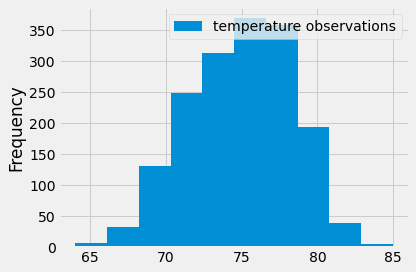

In [35]:
query_temp(6)

,temperature observations
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


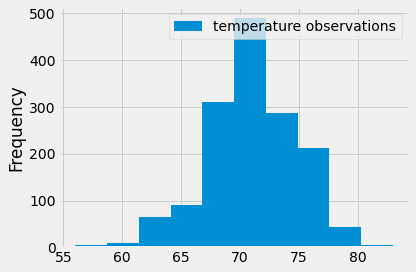

In [30]:
query_temp(12)

In [36]:
def query_prcp(month):
    results = []
    results = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==month).all()
    df = pd.DataFrame(results, columns=['date','precipitation scores'])
    df.plot.hist()
    plt.tight_layout()
    return df.describe()

,precipitation scores
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


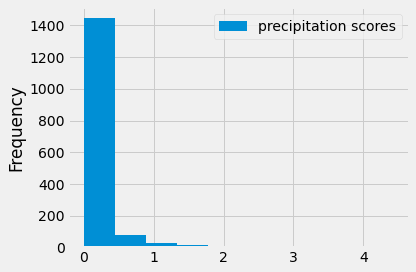

In [37]:
query_prcp(6)

,precipitation scores
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


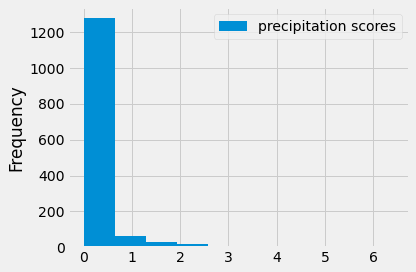

In [38]:
query_prcp(12)